In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import pysindy as ps
import utils

In [2]:
dataset_folder = "D:/Robotics/neural-fly-main/neural-fly-main/data/experiment"

features1 = ['v']
RawData1 = utils.load_data(dataset_folder)
Data1 = utils.format_data(RawData1, features=features1)

In [3]:
Data1[21][0][0][0]

-0.044761709837136655

In [4]:
v = np.zeros((2511,3),dtype = np.float64)
for row in range(len(v)):
    for column in range(3):
        v[row][column] = Data1[21][0][row][column]
v.shape

(2511, 3)

In [5]:
features2 = ['T_sp']
RawData2 = utils.load_data(dataset_folder)
Data2 = utils.format_data(RawData2, features=features2)

In [6]:
Data2[21][0][0][0]

0.4795170554396625

In [7]:
fu = np.zeros((2511,3),dtype = np.float64)
for row in range(len(fu)):
    fu[row][2] = Data2[21][0][row][0]
fu.shape

(2511, 3)

In [8]:
R = np.zeros((2511,3,3),dtype = np.float64)
features3 = ['R']
RawData3 = utils.load_data(dataset_folder)
Data3 = utils.format_data(RawData3, features=features3)

In [9]:
Data3[21][0][0]

array([[ 0.99297302,  0.00259545,  0.11831239],
       [-0.00334042,  0.99997581,  0.00609883],
       [-0.1182937 , -0.00645119,  0.99295769]])

In [10]:
for matrix in range(len(R)):
    for row in range(3):
        for column in range(3):
            R[matrix][row][column] = Data3[21][0][matrix][row][column]

In [11]:
result = np.matmul(R[2],fu[2])
print(fu[0])
result

[0.         0.         0.47951706]


array([0.0561862 , 0.00340399, 0.47557537])

In [12]:
Rfu = np.zeros((2511,3),dtype = np.float64)
for row in range(len(Rfu)):
    Rfu[row] = np.matmul(R[row],fu[row])
Rfu

array([[0.05673281, 0.00292449, 0.47614015],
       [0.05660542, 0.00300387, 0.47550944],
       [0.0561862 , 0.00340399, 0.47557537],
       ...,
       [0.02467848, 0.0076888 , 0.46232764],
       [0.020522  , 0.00597442, 0.37291699],
       [0.01433687, 0.00388123, 0.25284164]])

In [13]:
dt = 0.02
stlsq_optimizer = ps.STLSQ(threshold=.1, alpha=.5)

library_functions = [
    lambda x : np.exp(x),
    lambda x : np.square(x),
    lambda x : x,
    lambda x : np.exp(-x)
]
library_function_names = [
    lambda x : 'exp(' + x + ')',
    lambda x : x + '^2',
    lambda x : x,
    lambda x : 'exp(' + '-' + x + ')'
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_library, optimizer=stlsq_optimizer)
model.fit(v, u=Rfu, t=dt)
model.print()

(x0)' = -0.361 exp(x1) + 2334.579 exp(u0) + -5.108 exp(u2) + -0.568 x0^2 + -183.055 u0^2 + 1.202 x0 + -4616.089 u0 + 1.286 exp(-x0) + -2313.625 exp(-u0) + -6.928 exp(-u1) + -13.122 exp(-u2)
(x1)' = -3468.045 exp(u1) + 6950.307 u1 + 3467.931 exp(-u1)
(x2)' = 0.816 exp(x0) + 16.424 exp(x1) + -0.550 exp(x2) + -98.640 exp(u0) + 1623454.929 exp(u1) + 9158.806 exp(u2) + -1.748 x0^2 + 0.963 x2^2 + -14788.206 u2^2 + 0.369 x0 + -0.293 x2 + -3279626.558 u1 + 14240.409 u2 + 1.060 exp(-x0) + 16.134 exp(-x1) + -0.806 exp(-x2) + -110.898 exp(-u0) + -1656325.182 exp(-u1) + 23945.478 exp(-u2)


In [14]:
model2 = ps.SINDy(optimizer=stlsq_optimizer)
model2.fit(v, u=Rfu, t=dt)
model2.print()

(x0)' = -1.868 1 + -0.412 x0 + 3.928 x1 + 0.022 x2 + 12.875 u0 + 5.148 u1 + 3.691 u2 + -0.269 x0 x1 + -1.415 x0 u0 + 0.414 x0 u2 + 0.401 x1 x2 + -11.303 x1 u2 + -1.529 x2 u0 + 0.317 x2 u2 + -34.544 u0^2 + 24.774 u0 u2 + -5.027 u2^2
(x1)' = -4.323 u1 + -0.540 x0 x1 + 0.033 x0 u0 + 12.458 u1 u2
(x2)' = -7.560 1 + -0.495 x0 + 4.504 x1 + 0.624 x2 + 94.041 u1 + 6.552 u2 + -0.464 x0^2 + 7.494 x0 u0 + 0.704 x0 u2 + -0.172 x1 x2 + -0.597 x1 u2 + -4.611 x2 u0 + -1.024 x2 u2 + -9.829 u0 u2 + -180.929 u1 u2 + 22.222 u2^2


### Position Actual

In [15]:
features4 = ['p']
RawData4 = utils.load_data(dataset_folder)
Data4 = utils.format_data(RawData4, features=features4)

In [16]:
pos = np.zeros((2511,3),dtype = np.float64)
for row in range(len(pos)):
    for column in range(3):
        pos[row][column] = Data4[21][0][row][column]
pos.shape

(2511, 3)

In [17]:
pos

array([[-0.1459854 , -0.02481866,  2.12432257],
       [-0.1465864 , -0.02506804,  2.12421383],
       [-0.14733453, -0.02541521,  2.1241028 ],
       ...,
       [ 0.30095019,  0.00343549,  2.23770996],
       [ 0.28099194,  0.00368761,  2.26548276],
       [ 0.26271323,  0.00391967,  2.29081697]])

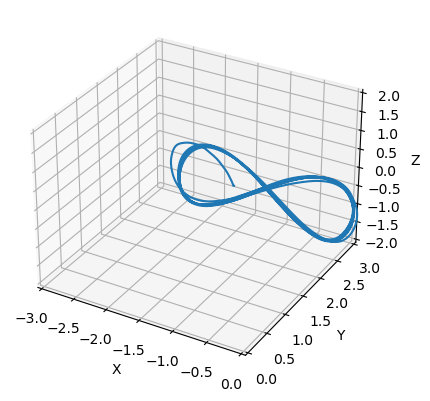

In [18]:


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlim3d([-3, 0])
ax.set_ylim3d([0, 3])
ax.set_zlim3d([-2, 2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot3D(pos[:,0],pos[:,1],pos[:,2])
plt.show()

### Position from learned position dynamics

In [19]:
a = np.zeros((2511,3),dtype = np.float64)
for ele in range(2511):
    a[ele][0] = -1.868 -0.412*v[ele][0] +3.928*v[ele][1] +0.022*v[ele][2] +12.875*Rfu[ele][0] +5.148*Rfu[ele][1] +3.691*Rfu[ele][2] -0.269*v[ele][0]*v[ele][1] -1.415*v[ele][0]*Rfu[ele][0] +0.414*v[ele][0]*Rfu[ele][2] + 0.401*v[ele][1]*v[ele][2] -11.303*v[ele][1]*Rfu[ele][2] -1.529*v[ele][2]*Rfu[ele][0] + 0.317*v[ele][2]*Rfu[ele][2] -34.544*np.square(Rfu[ele][0]) + 24.774*Rfu[ele][0]*Rfu[ele][2] - 5.027*np.square(Rfu[ele][2])
    
for ele in range(2511):   
    a[ele][1] = -4.323*Rfu[ele][1] -0.540*v[ele][0]*v[ele][1] + 0.033*v[ele][0]*Rfu[ele][0] + 12.458*Rfu[ele][1]*Rfu[ele][2]
    
for ele in range(2511):
    a[ele][2] = -7.560 -0.495*v[ele][0] +4.504*v[ele][1] +0.624*v[ele][2] +94.041*Rfu[ele][1] +6.552*Rfu[ele][2] -0.464*np.square(v[ele][0]) + 7.494*v[ele][0]*Rfu[ele][0] +0.704*v[ele][0]*Rfu[ele][2] -0.172*v[ele][1]*v[ele][2] -0.597*v[ele][1]*Rfu[ele][2] -4.611*v[ele][2]*Rfu[ele][0] -1.024*v[ele][2]*Rfu[ele][2] -9.829*Rfu[ele][0]*Rfu[ele][2] -180.929*Rfu[ele][1]*Rfu[ele][2] + 22.222*np.square(Rfu[ele][2]) 

In [20]:
a.shape
t = np.linspace(0.0,50.2,2511)

In [21]:
t.shape

(2511,)

In [22]:
#rk4 integrator

def rk4(func, tk, yk, dt):
    
    f1 = func(tk, yk)
    f2 = func(tk + dt / 2, yk + (f1 * (dt / 2)))
    f3 = func(tk + dt / 2, yk + (f2 * (dt / 2)))
    f4 = func(tk + dt, yk + (f3 * dt))

    return yk + (dt / 6) * (f1 + (2 * f2) + (2 * f3) + f4)

In [23]:
def acc(tk,yk):
    count = tk/0.02
    return a[int(count)]

In [24]:
vel = np.zeros((2511,3),dtype = np.float64)
yk = v[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(acc,tk,yk,dt)
    vel[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1 

In [25]:
def velocity(tk,yk):
    count = tk/0.02
    return vel[int(count)]

In [26]:
pos_sindy = np.zeros((2511,3),dtype = np.float64)
xk = pos[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(velocity,tk,yk,dt)
    pos_sindy[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1

In [27]:
pos_sindy

array([[ -1.00850022,   0.59860575,   1.52037831],
       [ -1.00932564,   0.59827607,   1.51993655],
       [ -1.01012199,   0.59794848,   1.51960287],
       ...,
       [ -9.80440292,  14.88125494, -22.45088195],
       [ -9.821197  ,  14.89123723, -22.4255331 ],
       [  0.        ,   0.        ,   0.        ]])

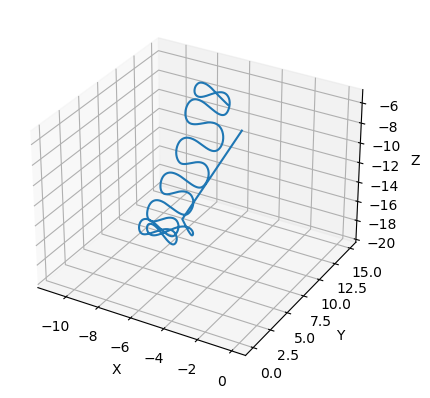

In [28]:


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_zlim3d([-20, -5])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot3D(pos_sindy[:,0],pos_sindy[:,1],pos_sindy[:,2])
plt.show()

In [29]:
ac = np.zeros((2511,3),dtype = np.float64)
for ele in range(2511):
    ac[ele][0] = -0.361*np.exp(v[ele][1]) +  2334.579*np.exp(Rfu[ele][0]) -5.108*np.exp(Rfu[ele][2]) -0.568*np.square(v[ele][0]) -183.055*np.square(Rfu[ele][0]) + 1.202*v[ele][0] -4616.089*Rfu[ele][0] + 1.286*np.exp(-v[ele][0])  -2313.625*np.exp(-Rfu[ele][0]) -6.928*np.exp(-Rfu[ele][1]) -13.122*np.exp(-Rfu[ele][2])

for ele in range(2511):
    ac[ele][1] =  -3468.045 *np.exp(Rfu[ele][1]) + 6950.307 *Rfu[ele][1] + 3467.931 *np.exp(-Rfu[ele][1])
    
for ele in range(2511):
    ac[ele][2] =  0.816 *np.exp(v[ele][0]) + 16.424 *np.exp(v[ele][1]) + -0.550 *np.exp(v[ele][2]) + -98.640 *np.exp(Rfu[ele][0]) + 1623454.929 *np.exp(Rfu[ele][1]) + 9158.806 *np.exp(Rfu[ele][2]) + -1.748*np.square(v[ele][0]) + 0.963*np.square(v[ele][2]) + -14788.206*np.square(Rfu[ele][2]) + 0.369 *v[ele][0] + -0.293 *v[ele][2] + -3279626.558 *Rfu[ele][1] + 14240.409 *Rfu[ele][2] + 1.060 *np.exp(-v[ele][0]) + 16.134 *np.exp(-v[ele][1]) + -0.806 *np.exp(-v[ele][2]) + -110.898 *np.exp(-Rfu[ele][0]) + -1656325.182 *np.exp(-Rfu[ele][1]) + 23945.478 *np.exp(-Rfu[ele][2])

In [30]:
def acc2(tk,yk):
    count = tk/0.02
    return ac[int(count)]

In [31]:
vel2 = np.zeros((2511,3),dtype = np.float64)
yk = v[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(acc2,tk,yk,dt)
    vel2[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1 

In [32]:
def velocity2(tk,yk):
    count = tk/0.02
    return vel2[int(count)]

In [33]:
pos_sindy2 = np.zeros((2511,3),dtype = np.float64)
xk = pos[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(velocity2,tk,yk,dt)
    pos_sindy2[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1

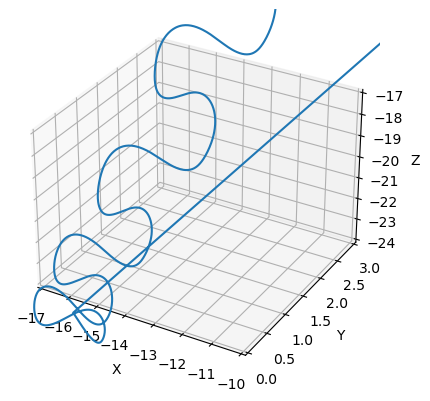

In [42]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim3d([-17, -10])
ax.set_ylim3d([0, 3])
ax.set_zlim3d([-24, -17])

ax.plot3D(pos_sindy2[:,0],pos_sindy2[:,1],pos_sindy2[:,2])
plt.show()

In [35]:
pos_sindy

array([[ -1.00850022,   0.59860575,   1.52037831],
       [ -1.00932564,   0.59827607,   1.51993655],
       [ -1.01012199,   0.59794848,   1.51960287],
       ...,
       [ -9.80440292,  14.88125494, -22.45088195],
       [ -9.821197  ,  14.89123723, -22.4255331 ],
       [  0.        ,   0.        ,   0.        ]])

In [36]:
pos[0]

array([-0.1459854 , -0.02481866,  2.12432257])

In [37]:
pos_sindy2

array([[ -1.03753947,   0.03280944,   1.48449818],
       [ -1.03842482,   0.03241477,   1.48418111],
       [ -1.03930905,   0.03199445,   1.48404209],
       ...,
       [-13.589602  ,  -1.48332848, -21.3082349 ],
       [-13.60687951,  -1.48277553, -21.28348517],
       [  0.        ,   0.        ,   0.        ]])